# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import string

from scipy.stats import linregress

# Import weather key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_city_file = "output_data/cities.csv"

output_weather_file = "output_data/city_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, use size>=500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(string.capwords(city))

# Print the city count to confirm sufficient count
len(cities)

1500

In [5]:
#practice creating a dictionary and saving dictionary to csv file
city_dict = {
    "city": cities,
    "lat": lats,
    "long": lngs,
}
city_data = pd.DataFrame(city_dict)


export_csv = city_data.to_csv (output_city_file, index = None, header=True)

city_data.head()


,city,lat,long
0,Ust-nera,64.278545,141.479164
1,Riyadh,24.117157,48.526174
2,Cape Town,-60.272534,-14.072936
3,Beian,48.635693,126.351849
4,Mataura,-76.220531,-146.841743


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={wkey}&units={units}&q="

# set up lists to hold reponse info
latitude = []
longitude = []
temp = []
maxTemp = []
humidity = []
cloud = []
wind = []
mycity = []
uniqueCityList = []
myCount = 0

#cities = ["Paris", "London", "Oslo", "Beijing"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if city in uniqueCityList:
        pass
    else:        
        uniqueCityList.append(city)
        try:
            response = requests.get(query_url + city).json()
            myCount = myCount+1        

            #wait 60 seconds after 50 reads, since only allowed 60 reads per minute        
            if myCount == 50:
                time.sleep(60)
                myCount = 0

            #store city info
            mycity.append(city)
            longitude.append(response['coord']['lon'])
            latitude.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            maxTemp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            wind.append(response['wind']['speed'])
            cloud.append(response['clouds']['all'])

        #filter out errors, caused by city not foud
        except:
            pass


{'coord': {'lon': 143.24, 'lat': 64.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -3.01, 'pressure': 1015.05, 'humidity': 63, 'temp_min': -3.01, 'temp_max': -3.01, 'sea_level': 1015.05, 'grnd_level': 899.68}, 'wind': {'speed': 2.76, 'deg': 9.144}, 'clouds': {'all': 3}, 'dt': 1569372583, 'sys': {'message': 0.0054, 'country': 'RU', 'sunrise': 1569356171, 'sunset': 1569399709}, 'timezone': 36000, 'id': 2120048, 'name': 'Ust-Nera', 'cod': 200}
{'coord': {'lon': 46.72, 'lat': 24.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 28, 'pressure': 1011, 'humidity': 28, 'temp_min': 28, 'temp_max': 28}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1569372410, 'sys': {'type': 1, 'id': 7424, 'message': 0.0063, 'country': 'SA', 'sunrise': 1569379355, 'sunset': 1569422842}, 'timezone': 10800, 'id': 10841

{'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3, 'pressure': 1003, 'humidity': 86, 'temp_min': 3, 'temp_max': 3}, 'wind': {'speed': 6.23, 'deg': 339.021}, 'clouds': {'all': 86}, 'dt': 1569372792, 'sys': {'type': 1, 'id': 165, 'message': 0.0067, 'country': 'GL', 'sunrise': 1569316286, 'sunset': 1569360097}, 'timezone': -7200, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
{'coord': {'lon': -38.6, 'lat': -3.71}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1015, 'humidity': 78, 'temp_min': 26, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1569372793, 'sys': {'type': 1, 'id': 8363, 'message': 0.0063, 'country': 'BR', 'sunrise': 1569313386, 'sunset': 1569356998}, 'timezone': -10800, 'id': 6320062, 'name': 'Vila Velha'

{'coord': {'lon': 173.78, 'lat': -35.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 14.89, 'pressure': 1013.04, 'humidity': 64, 'temp_min': 14.89, 'temp_max': 14.89, 'sea_level': 1013.04, 'grnd_level': 1005.86}, 'wind': {'speed': 7.68, 'deg': 262.903}, 'rain': {'3h': 0.25}, 'clouds': {'all': 3}, 'dt': 1569372656, 'sys': {'message': 0.0076, 'country': 'NZ', 'sunrise': 1569348675, 'sunset': 1569392549}, 'timezone': 43200, 'id': 2189343, 'name': 'Kaeo', 'cod': 200}
take a one minute break
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7, 'pressure': 1004, 'humidity': 70, 'temp_min': 7, 'temp_max': 7}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1569372930, 'sys': {'type': 1, 'id': 8303, 'message': 0.0073,

take a one minute break
{'coord': {'lon': -133.03, 'lat': 69.44}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 5, 'pressure': 1009, 'humidity': 80, 'temp_min': 5, 'temp_max': 5}, 'visibility': 24140, 'wind': {'speed': 1.5, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1569373333, 'sys': {'type': 1, 'id': 942, 'message': 0.0074, 'country': 'CA', 'sunrise': 1569335999, 'sunset': 1569379701}, 'timezone': -21600, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}
{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22, 'pressure': 1012, 'humidity': 94, 'temp_min': 22, 'temp_max': 22}, 'visibility': 6000, 'wind': {'speed': 1, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1569373061, 'sys': {'type': 1, 'id': 9229, 'message': 0.0058, 'country': 'IN', 'sunrise': 1569372672, 'sunset': 1569416199}, 'timezone': 19

{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.6, 'pressure': 1014, 'humidity': 69, 'temp_min': 20, 'temp_max': 23}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1569373336, 'sys': {'type': 1, 'id': 8521, 'message': 0.0076, 'country': 'EC', 'sunrise': 1569325808, 'sunset': 1569369410}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
{'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 10, 'pressure': 992, 'humidity': 76, 'temp_min': 10, 'temp_max': 10}, 'visibility': 24140, 'wind': {'speed': 7.7, 'deg': 270}, 'clouds': {'all': 90}, 'dt': 1569373289, 'sys': {'type': 1, 'id': 935, 'message': 0.0058, 'country': 'CA', 'sunrise': 1569327618, 'sunset': 1569371204}, 'timezone': -18000, '

take a one minute break
{'coord': {'lon': -37.64, 'lat': 65.61}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 5, 'pressure': 996, 'humidity': 93, 'temp_min': 5, 'temp_max': 5}, 'wind': {'speed': 3.1, 'deg': 70}, 'clouds': {'all': 100}, 'dt': 1569373794, 'sys': {'type': 1, 'id': 81, 'message': 0.0097, 'country': 'GL', 'sunrise': 1569313086, 'sunset': 1569356837}, 'timezone': -7200, 'id': 3424607, 'name': 'Tasiilaq', 'cod': 200}
{'coord': {'lon': -58.16, 'lat': 6.8}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11n'}], 'base': 'stations', 'main': {'temp': 27.91, 'pressure': 1013, 'humidity': 74, 'temp_min': 27, 'temp_max': 29}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1569373794, 'sys': {'type': 1, 'id': 8776, 'message': 0.0064, 'country': 'GY', 'sunrise': 1569318097, 'sunset': 1569361674}, 'timezone': -14400,

{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.61, 'pressure': 1014, 'humidity': 69, 'temp_min': 20, 'temp_max': 23}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1569373990, 'sys': {'type': 1, 'id': 8521, 'message': 0.0056, 'country': 'EC', 'sunrise': 1569325808, 'sunset': 1569369410}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
{'coord': {'lon': 27.91, 'lat': -33.02}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.39, 'pressure': 1038.7, 'humidity': 70, 'temp_min': 11.39, 'temp_max': 11.39, 'sea_level': 1038.7, 'grnd_level': 1000.93}, 'wind': {'speed': 1.48, 'deg': 108.056}, 'clouds': {'all': 90}, 'dt': 1569373927, 'sys': {'message': 0.0072, 'country': 'ZA', 'sunrise': 1569383664, 'sunset': 1569427560}, 'timezone': 

{'coord': {'lon': 20.43, 'lat': 38.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.11, 'pressure': 1005, 'humidity': 76, 'temp_min': 21.11, 'temp_max': 21.11}, 'wind': {'speed': 4.02, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1569374190, 'sys': {'type': 3, 'id': 2004516, 'message': 0.0096, 'country': 'GR', 'sunrise': 1569385689, 'sunset': 1569429125}, 'timezone': 10800, 'id': 258175, 'name': 'Lixourion', 'cod': 200}
take a one minute break
{'coord': {'lon': -67.52, 'lat': -46.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.99, 'pressure': 1016.76, 'humidity': 37, 'temp_min': 16.99, 'temp_max': 16.99, 'sea_level': 1016.76, 'grnd_level': 983.18}, 'wind': {'speed': 4.33, 'deg': 237.179}, 'clouds': {'all': 3}, 'dt': 1569374257, 'sys': {'message': 0.0059, 'country': 'AR', 'sunrise': 1569320135, 'sunset': 1569364127}, 'timezone': 

take a one minute break
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7, 'pressure': 1004, 'humidity': 70, 'temp_min': 7, 'temp_max': 7}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1569374257, 'sys': {'type': 1, 'id': 8303, 'message': 0.0063, 'country': 'AR', 'sunrise': 1569320231, 'sunset': 1569364411}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}


In [ ]:
len(mycity) 

In [42]:
len(uniqueCityList)        

574

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": mycity,
    "lat": latitude,
    "long": longitude,
    "temp": temp,
    "max_temp": maxTemp,
    "humidity": humidity,
    "wind speed": wind,
    "clouds": cloud
}
weather_data = pd.DataFrame(weather_dict)

# print result to file
export_csv2 = weather_data.to_csv (output_weather_file, index = None, header=True)

#display the data frame
weather_data.count()

city          1351
lat           1351
long          1351
temp          1351
max_temp      1351
humidity      1351
wind speed    1351
clouds        1351
dtype: int64

In [9]:
weather_data.head()

,city,lat,long,temp,max_temp,humidity,wind speed,clouds
0,Ust-nera,64.57,143.24,-3.01,-3.01,63,2.76,3
1,Riyadh,24.63,46.72,28.00,28.00,28,2.10,0
2,Cape Town,-33.93,18.42,14.74,16.11,76,4.10,0
3,Beian,63.66,9.57,10.30,10.56,76,6.20,0
4,Mataura,-46.19,168.86,5.56,5.56,78,3.13,100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

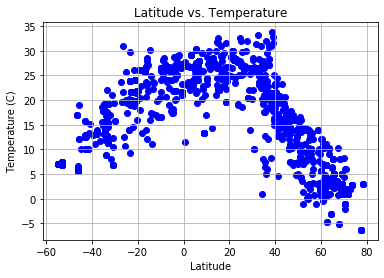

In [32]:
#scatter plot
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature")

plt.scatter(weather_data["lat"],weather_data["temp"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_1_Latitude_vs_Temperature.pdf', dpi=300)  
plt.show()

#### Latitude vs. Humidity Plot

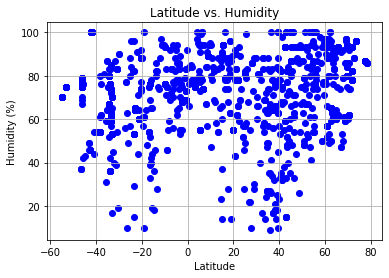

In [31]:
#scatter plot
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")

plt.scatter(weather_data["lat"],weather_data["humidity"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_2_Latitude_vs_Humidity.pdf', dpi=300)  
plt.show()

#### Latitude vs. Cloudiness Plot

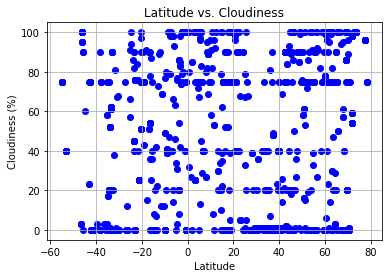

In [30]:
#scatter plot
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness")

plt.scatter(weather_data["lat"],weather_data["clouds"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_3_Latitude_vs_Cloudiness.pdf', dpi=300)  
plt.show()

#### Latitude vs. Wind Speed Plot

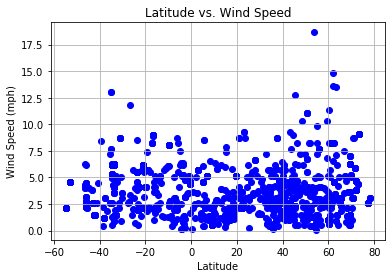

In [13]:
#scatter plot
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed")

plt.scatter(weather_data["lat"],weather_data["wind speed"],color="blue",marker="o")
plt.grid()

plt.savefig('figure_4_Latitude_vs_WindSpeed.pdf', dpi=300)  
plt.show()



## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames
northHemisphere_dict = {
    "city": weather_data.loc[weather_data["lat"]>0]["city"],
    "lat": weather_data.loc[weather_data["lat"]>0]["lat"],
    "max_temp": weather_data.loc[weather_data["lat"]>0]["max_temp"],
    "humidity": weather_data.loc[weather_data["lat"]>0]["humidity"],
    "wind speed": weather_data.loc[weather_data["lat"]>0]["wind speed"],
    "clouds": weather_data.loc[weather_data["lat"]>0]["clouds"]
}
northHemisphere_data = pd.DataFrame(northHemisphere_dict)

In [15]:
southHemisphere_dict = {
    "city": weather_data.loc[weather_data["lat"]<0]["city"],
    "lat": weather_data.loc[weather_data["lat"]<0]["lat"],
    "max_temp": weather_data.loc[weather_data["lat"]<0]["max_temp"],
    "humidity": weather_data.loc[weather_data["lat"]<0]["humidity"],
    "wind speed": weather_data.loc[weather_data["lat"]<0]["wind speed"],
    "clouds": weather_data.loc[weather_data["lat"]<0]["clouds"]
}
southHemisphere_data = pd.DataFrame(southHemisphere_dict)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

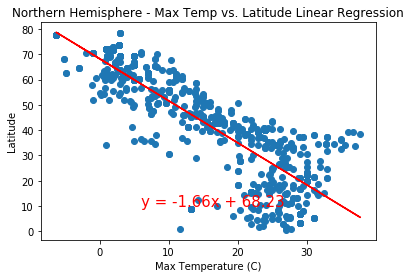

In [33]:
x_values = northHemisphere_data["max_temp"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

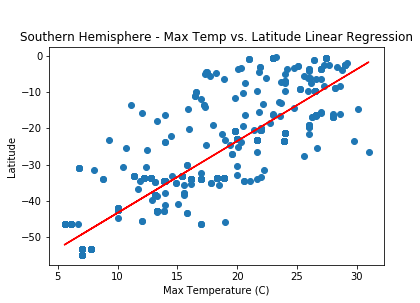

In [34]:
x_values = southHemisphere_data["max_temp"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

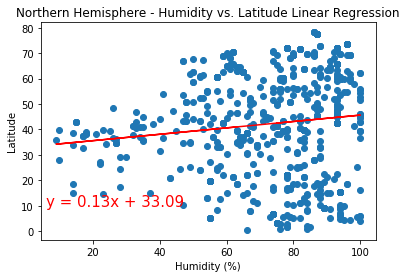

In [35]:
x_values = northHemisphere_data["humidity"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

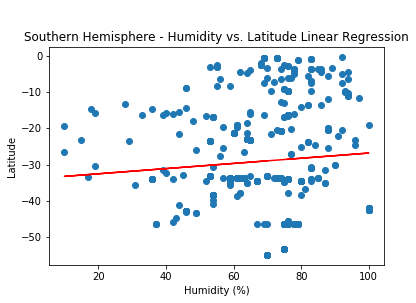

In [36]:
x_values = southHemisphere_data["humidity"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

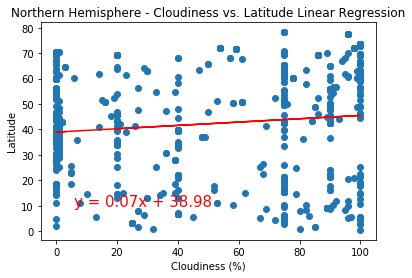

In [37]:
x_values = northHemisphere_data["clouds"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

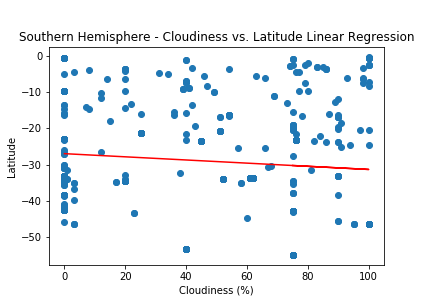

In [38]:
x_values = southHemisphere_data["clouds"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

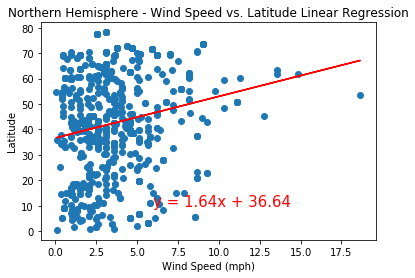

In [39]:
x_values = northHemisphere_data["wind speed"]
y_values = northHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

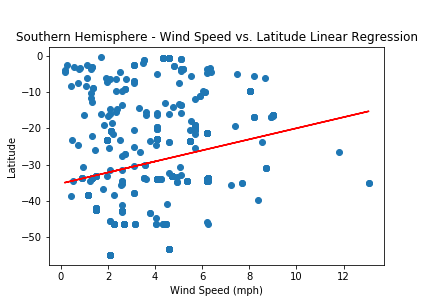

In [40]:
x_values = southHemisphere_data["wind speed"]
y_values = southHemisphere_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()